Run with the commands:
conda activate dna-class
cd /home/labs/bioservices/pmrefael/ML/dna-classification/dnaClass/pytorch
jupyter notebook


(495, 490, 4)
(224, 224, 4)
(4, 224, 224, 4)


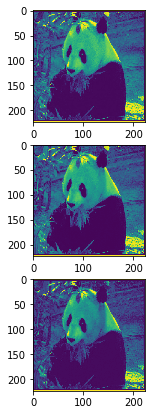

In [69]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
print np.array(Image.open("panda.PNG")).shape
panda1 = np.array(Image.open("panda.PNG").resize((224,224)))
print panda1.shape
panda2 = np.array(Image.open("panda.PNG").resize((224,224)))
panda3 = np.array(Image.open("panda.PNG").resize((224,224)))
panda4 = np.array(Image.open("panda.PNG").resize((224,224)))
pandas = np.array([panda1, panda2, panda3, panda4])

pandas.reshape(-1,224,224)

print pandas.shape

panda_tensor = torch.from_numpy(panda)
fig=plt.figure(figsize=(7, 7))
fig.add_subplot(3,1,1)
plt.imshow(panda_tensor[:,:,0])
fig.add_subplot(3,1,2)
plt.imshow(panda_tensor[:,:,1])
fig.add_subplot(3,1,3)
plt.imshow(panda_tensor[:,:,2])
plt.show()


In [92]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
dtype = torch.FloatTensor

Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False)

tensor([ 3.3000,  4.4000,  5.5000,  6.7100,  6.9300,  4.1680,  9.7790,  6.1820,
         7.5900,  2.1670,  7.0420, 10.7910,  5.3130,  7.9970,  5.6540,  9.2700,
         3.1000])

In [86]:

import torch
torch.__version__
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

In [109]:
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        if type(a) == Variable:
            l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [111]:
x,y = get_data()               # x - represents training data,y - represents target variables
w,b = get_weights()           # w,b - Learnable parameters
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number